In [3]:
# train.py

import os
import cv2
import numpy as np
import pandas as pd
import joblib
import tqdm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import insightface

# Configurations
IMAGE_DIR = "archives/Original Images/Original Images"
CSV_PATH = "archives/Dataset.csv"
MODEL_SAVE_PATH = "models/svm_insightface.pkl"

# Load Dataset
df = pd.read_csv(CSV_PATH)

# Load InsightFace model
model = insightface.app.FaceAnalysis(name='buffalo_l', providers=['CPUExecutionProvider'])
model.prepare(ctx_id=0)

def get_face_embedding(image):
    faces = model.get(image)
    if len(faces) == 0:
        return None
    return faces[0].normed_embedding  # (512,)

# Extract features
embeddings = []
labels = []

for idx, (img_name, label) in tqdm.tqdm(enumerate(df.values), total=len(df)):
    img_path = os.path.join(IMAGE_DIR, label, img_name)
    if not os.path.exists(img_path):
        continue
    image = cv2.imread(img_path)
    if image is None:
        continue

    embed = get_face_embedding(image)
    if embed is not None:
        embeddings.append(embed)
        labels.append(label)

print(f"Total usable faces: {len(embeddings)}")

# Split Data
x_train, x_test, y_train, y_test = train_test_split(
    embeddings, labels, test_size=0.15, stratify=labels, random_state=42
)

# Train SVM
svm_model = SVC(C=1.0, kernel='linear', probability=True)
svm_model.fit(x_train, y_train)

print("Model trained ✅")

# Evaluate
y_pred = svm_model.predict(x_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/klaus/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/klaus/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/klaus/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/klaus/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/klaus/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
se

100%|██████████| 2562/2562 [07:18<00:00,  5.84it/s]


Total usable faces: 2556
Model trained ✅

Classification Report:
                    precision    recall  f1-score   support

      Akshay Kumar       1.00      1.00      1.00         7
Alexandra Daddario       1.00      1.00      1.00        14
        Alia Bhatt       1.00      1.00      1.00        12
  Amitabh Bachchan       1.00      1.00      1.00        11
      Andy Samberg       1.00      1.00      1.00        14
    Anushka Sharma       1.00      1.00      1.00        10
     Billie Eilish       1.00      1.00      1.00        15
         Brad Pitt       1.00      1.00      1.00        18
    Camila Cabello       1.00      1.00      1.00        13
   Charlize Theron       1.00      1.00      1.00        12
       Claire Holt       1.00      1.00      1.00        14
      Courtney Cox       1.00      1.00      1.00        12
    Dwayne Johnson       1.00      1.00      1.00         9
   Elizabeth Olsen       1.00      1.00      1.00        11
   Ellen Degeneres       1.00     

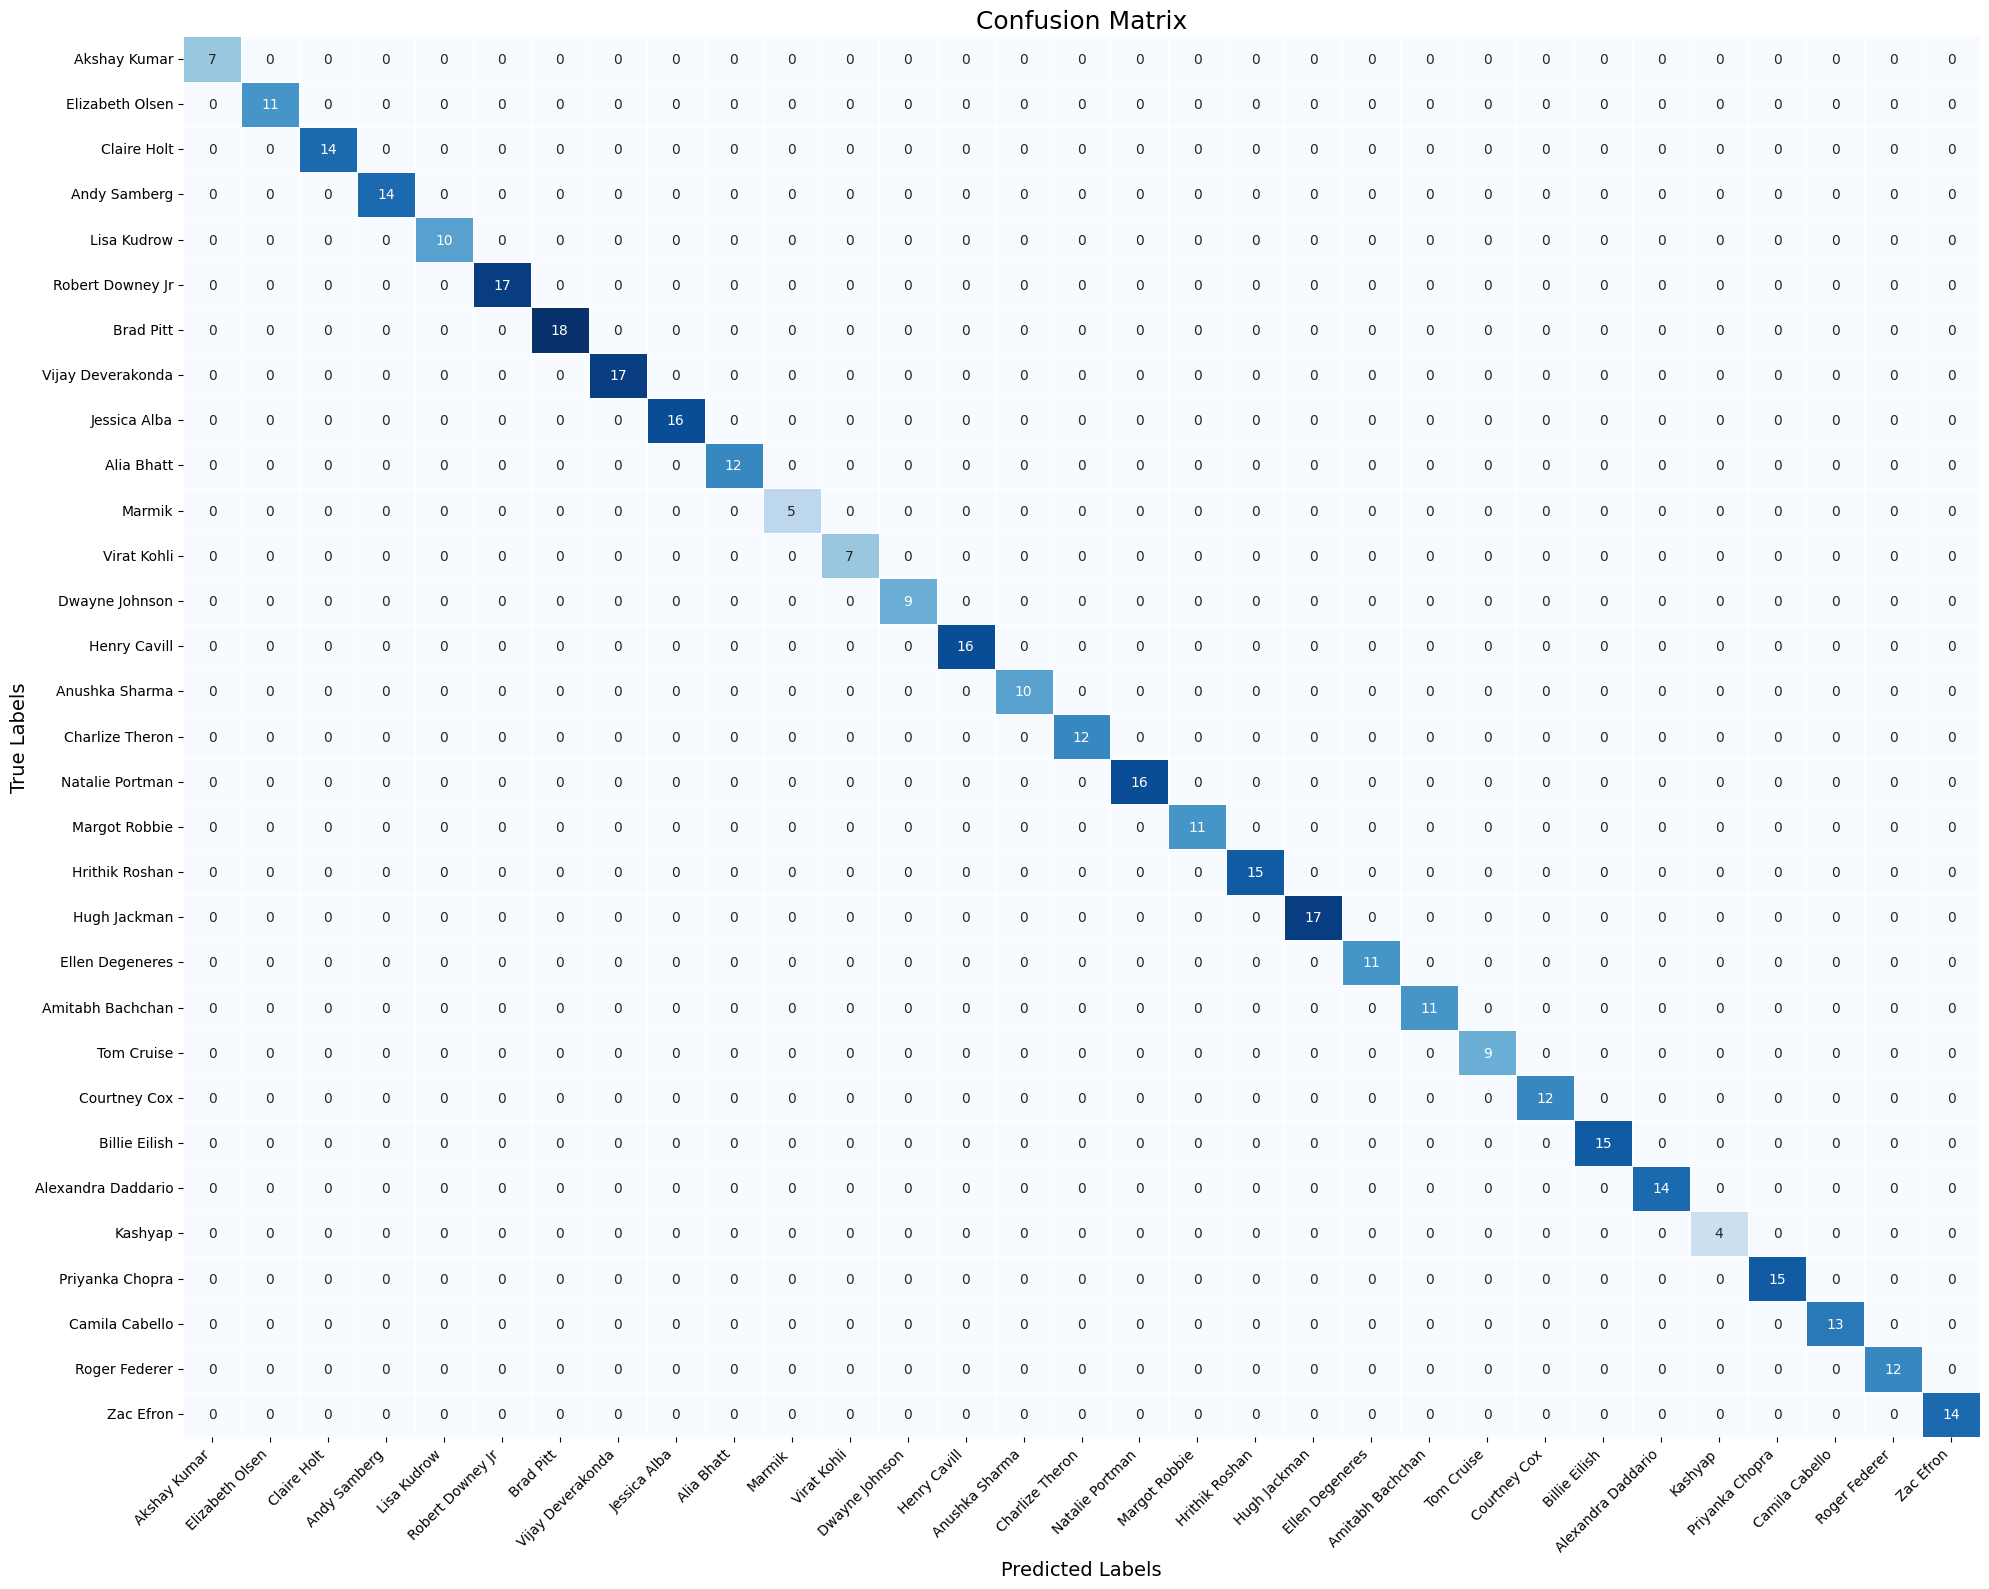

                    precision    recall  f1-score   support

      Akshay Kumar       1.00      1.00      1.00         7
Alexandra Daddario       1.00      1.00      1.00        14
        Alia Bhatt       1.00      1.00      1.00        12
  Amitabh Bachchan       1.00      1.00      1.00        11
      Andy Samberg       1.00      1.00      1.00        14
    Anushka Sharma       1.00      1.00      1.00        10
     Billie Eilish       1.00      1.00      1.00        15
         Brad Pitt       1.00      1.00      1.00        18
    Camila Cabello       1.00      1.00      1.00        13
   Charlize Theron       1.00      1.00      1.00        12
       Claire Holt       1.00      1.00      1.00        14
      Courtney Cox       1.00      1.00      1.00        12
    Dwayne Johnson       1.00      1.00      1.00         9
   Elizabeth Olsen       1.00      1.00      1.00        11
   Ellen Degeneres       1.00      1.00      1.00        11
      Henry Cavill       1.00      1.00

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)

    plt.figure(figsize=(20, 16))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels,
                yticklabels=labels,
                linewidths=0.5,
                cbar=False)

    plt.title('Confusion Matrix', fontsize=18)
    plt.xlabel('Predicted Labels', fontsize=14)
    plt.ylabel('True Labels', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Usage Example:
labels = list(set(y_test))  # Unique labels
plot_confusion_matrix(y_test, y_pred, labels=labels)

# Also, print classification report
print(classification_report(y_test, y_pred, digits=2))

# plot_confusion_matrix(y_test, y_pred, labels=list(set(y_test))) #ready to use funtion for confusion matrix


In [ ]:

# Save model
os.makedirs("models", exist_ok=True)
joblib.dump(svm_model, MODEL_SAVE_PATH)

print(f"Model saved at {MODEL_SAVE_PATH} ✅")

Model saved at models/svm_insightface.pkl ✅


In [ ]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
import insightface

# Initialize InsightFace model (same as in training)
insight_model = insightface.app.FaceAnalysis(name='buffalo_l', providers=['CPUExecutionProvider'])
insight_model.prepare(ctx_id=0)

def show_image(image, x=10, y=8, bgr=False):
    plt.figure(figsize=(x, y))
    if len(image.shape) == 2:
        plt.imshow(image, cmap='gray')
    elif len(image.shape) == 3:
        if bgr:
            image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
        plt.imshow(image)
    plt.axis('off')
    plt.show()

def draw_more_rounded_rectangle(img, pt1, pt2, color, thickness=2):
    """Draw a more rounded rectangle based on box size."""
    x1, y1 = pt1
    x2, y2 = pt2
    width = x2 - x1
    height = y2 - y1
    radius = int(min(width, height) * 0.4)  # 40% of smaller side -> more rounded

    # Draw straight lines
    cv.line(img, (x1 + radius, y1), (x2 - radius, y1), color, thickness)
    cv.line(img, (x1 + radius, y2), (x2 - radius, y2), color, thickness)
    cv.line(img, (x1, y1 + radius), (x1, y2 - radius), color, thickness)
    cv.line(img, (x2, y1 + radius), (x2, y2 - radius), color, thickness)

    # Draw four arcs
    cv.ellipse(img, (x1 + radius, y1 + radius), (radius, radius), 180, 0, 90, color, thickness)
    cv.ellipse(img, (x2 - radius, y1 + radius), (radius, radius), 270, 0, 90, color, thickness)
    cv.ellipse(img, (x1 + radius, y2 - radius), (radius, radius), 90, 0, 90, color, thickness)
    cv.ellipse(img, (x2 - radius, y2 - radius), (radius, radius), 0, 0, 90, color, thickness)

def predict_and_visualize(image_path, model, threshold=0.5):
    # Read and preprocess the image
    image = cv.imread(image_path)
    if image is None:
        print(f"Error loading image: {image_path}")
        return
    rgb_image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    image_height, image_width = image.shape[:2]

    # Detect faces
    faces = insight_model.get(rgb_image)

    if len(faces) == 0:
        print("No faces detected.")
        return

    for face in faces:
        embedding = face.normed_embedding
        bbox = face.bbox.astype(int)
        left, top, right, bottom = bbox[0], bbox[1], bbox[2], bbox[3]

        # Predict label
        probs = model.predict_proba([embedding])[0]
        best_idx = np.argmax(probs)
        confidence = probs[best_idx]
        name = model.classes_[best_idx] if confidence > threshold else "Unknown"

        # Draw more rounded rectangle
        draw_more_rounded_rectangle(image, (left, top), (right, bottom), color=(0, 255, 0), thickness=2)

        # Font settings
        font_scale = image_width / 800.0
        thickness_text = 2
        font = cv.FONT_HERSHEY_SIMPLEX
        label_text = f"{name} ({confidence:.2f})"
        (text_width, text_height), _ = cv.getTextSize(label_text, font, font_scale, thickness_text)

        # Adjust text position to not overflow
        text_x = left
        text_y = bottom + text_height + 10
        if text_y > image_height - 10:
            text_y = bottom - 10

        cv.putText(image, label_text, (text_x, text_y), font, font_scale, (0, 255, 0), thickness_text, cv.LINE_AA)

    show_image(image, bgr=True)


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/klaus/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/klaus/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/klaus/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/klaus/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/klaus/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
se

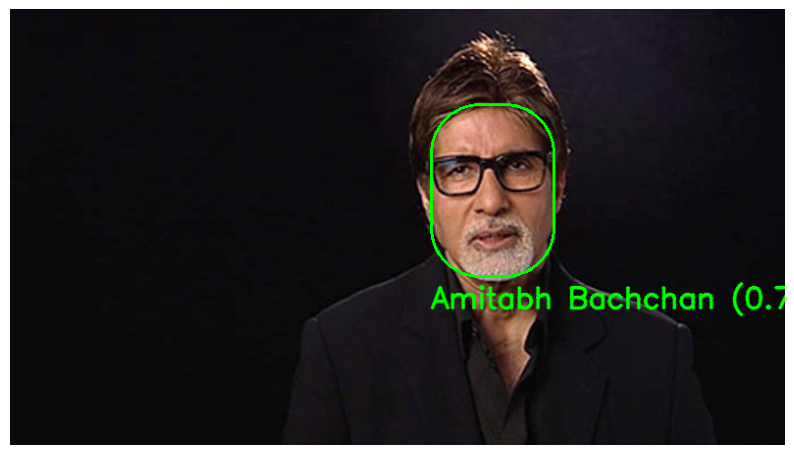

In [32]:
import joblib

# Load the trained SVM model
svm_model = joblib.load('models/svm_insightface.pkl')

# Predict and visualize
predict_and_visualize('archives/Original Images/Original Images/Amitabh Bachchan/Amitabh Bachchan_3.jpg', svm_model)


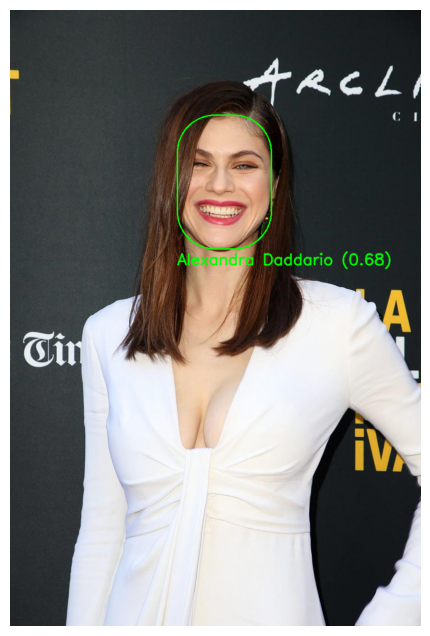

In [33]:
import joblib

# Load the trained SVM model
svm_model = joblib.load('models/svm_insightface.pkl')

# Predict and visualize
predict_and_visualize('archives/Original Images/Original Images/Alexandra Daddario/Alexandra Daddario_0.jpg', svm_model)


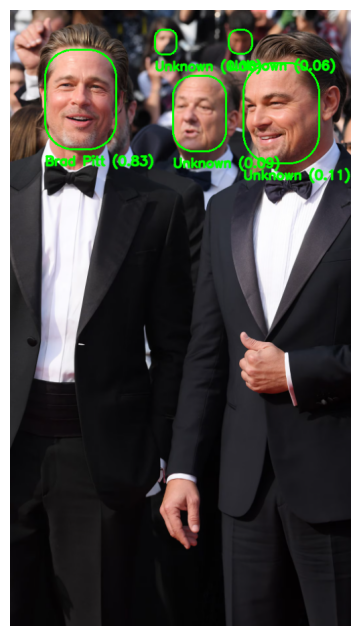

In [34]:
import joblib

# Load the trained SVM model
svm_model = joblib.load('models/svm_insightface.pkl')

# Predict and visualize
predict_and_visualize('archives/final-test-001.png', svm_model)


In [36]:
import joblib

try:
    # Load the trained classifier using joblib
    classifier_model = joblib.load('models/svm_insightface.pkl')
    print("Model loaded successfully")
except Exception as e:
    print(f"Error loading model: {e}")


Model loaded successfully
